# **Red Wine Quality Analysis**
___
---
AUTHOR - **ATHUL MK** 

INTERNSHIP PROJECT - **COGNORISE INFOTECH**

![Red Wine](red-wine1.jpg)



## **Objective**


The objective of this project is to analyze a dataset of red wine properties and quality ratings to gain insights into the factors that influence wine quality. This analysis aims to identify key features that are most strongly correlated with high-quality wine and provide valuable recommendations to winemakers or enthusiasts for improving wine quality. The project will involve data exploration, visualization, statistical analysis, and the development of predictive models to achieve these objectives.






## Data Source 
:kaggle [https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/code]


## Data charestistics 

- Fixed Acidity: The concentration of non-volatile acids in the wine.
- Volatile Acidity: The concentration of volatile acids in the wine.
- Citric Acid: The concentration of citric acid in the wine.
 - Residual Sugar: The amount of residual sugar left in the wine -after fermentation.
- Chlorides: The concentration of chlorides in the wine.
- Free Sulfur Dioxide: The concentration of free sulfur dioxide in the wine, which acts as an antioxidant.
- Total Sulfur Dioxide: The total concentration of sulfur dioxide in the wine, including both free and bound sulfur dioxide.
- Density: The density of the wine.
- pH: The pH level of the wine, indicating its acidity or alkalinity.
- Sulphates: The concentration of sulfates in the wine.
- Alcohol: The alcohol content of the wine.Z


## Libraries

In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Read data

In [69]:
data = pd.read_csv('https://raw.githubusercontent.com/athulmkpalath/cognorise-infotech-/main/winequality-red.csv')

In [70]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [71]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [72]:
data.shape

(1599, 12)

In [73]:
data.info


<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [75]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [76]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [77]:
data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

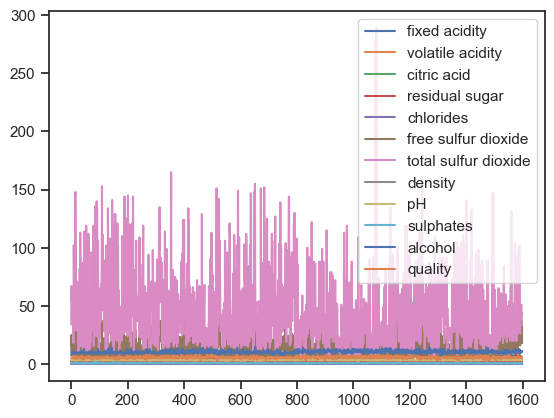

In [79]:
data.plot()

## **BEST WINE AT DIFFERENT CHARACTERISTICS**

### Best Wine at Fixed Acidity 7.0

In [82]:
# Filter by fixed acidity (e.g., fixed acidity of 7.0)
fixed_acidity_level = 7.0
filtered_wines = data[data['fixed acidity'] == fixed_acidity_level]

# Find the best wine based on quality rating
best_wine = filtered_wines[filtered_wines['quality'] == filtered_wines['quality'].max()]

print("Best Wine at Fixed Acidity", fixed_acidity_level)
print(best_wine)

Best Wine at Fixed Acidity 7.0
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
978             7.0              0.40         0.32             3.6      0.061   
1398            7.0              0.60         0.12             2.2      0.083   
1555            7.0              0.56         0.17             1.7      0.065   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
978                   9.0                  29.0  0.99416  3.28       0.49   
1398                 13.0                  28.0  0.99660  3.52       0.62   
1555                 15.0                  24.0  0.99514  3.44       0.68   

      alcohol  quality  
978     11.30        7  
1398    10.20        7  
1555    10.55        7  


The best wines with a fixed acidity level of 7.0 have the following characteristics:

- Fixed Acidity: The wines have a fixed acidity level of 7.0, which is considered moderate. Fixed acidity contributes to the structure and taste of the wine.

- Volatile Acidity: The wines have varying levels of volatile acidity, with values of 0.40, 0.60, and 0.56. These levels are within the typical range for wines and do not indicate excessive volatile acidity.

- Citric Acid Content: The citric acid content varies among these wines, with values of 0.32, 0.12, and 0.17. These levels contribute to the overall acidity and flavor balance of the wines.

- Residual Sugar: The residual sugar levels in these wines vary, with values of 2.2, 1.7, and 3.6 grams. These levels indicate a range of sweetness, from dry to off-dry.

- Chlorides: Chloride content is within the typical range for wines and does not significantly impact taste.

- Sulfur Dioxide Levels: Free sulfur dioxide levels range from 9.0 to 15.0, and total sulfur dioxide levels range from 24.0 to 29.0. These levels are within the typical range for wines.

- Density: The density of these wines varies but is within the typical range for wine.

- pH Value: The pH values of these wines range from 3.28 to 3.52, indicating varying acidity levels.

- Sulphates: Sulphate levels are within the typical range and contribute to the wine's aroma and flavor.

- Alcohol Content: The wines have alcohol content levels of 10.20%, 10.55%, and 11.30%. These are moderate alcohol levels.

- Quality Rating: All of the wines have quality ratings of 7, indicating they are of good quality.

In summary, wines with a fixed acidity level of 7.0 have a moderate level of fixed acidity, varying levels of volatile acidity, and citric acid content. They also have a range of sweetness, alcohol content, and acidity levels, but they are generally considered good quality wines with balanced flavor profiles.

### **Best Wine at Volatile Acidity**

In [84]:
# Filter by

volatile acidity (e.g., volatile acidity of 0.5)
volatile_acidity_level = 0.5
filtered_wines = data[data['volatile acidity'] == volatile_acidity_level]

# Find the best wine based on quality rating
best_wine = filtered_wines[filtered_wines['quality'] == filtered_wines['quality'].max()]

print("Best Wine at Volatile Acidity", volatile_acidity_level)
print(best_wine)

Best Wine at Volatile Acidity 0.5
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
657           12.0               0.5         0.59             1.4      0.073   
943            9.8               0.5         0.34             2.3      0.094   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
657                 23.0                  42.0  0.99800  2.92       0.68   
943                 10.0                  45.0  0.99864  3.24       0.60   

     alcohol  quality  
657     10.5        7  
943      9.7        7  


- Fixed Acidity: The wines have fixed acidity levels of 12.0 and 9.8. These are moderate to high levels of fixed acidity, which can contribute to the structure and taste of the wine.

- Volatile Acidity: The wines have a volatile acidity level of 0.5. This level is considered moderate. While higher volatile acidity can be undesirable, the wines mentioned have it at a manageable level.

- Citric Acid Content: The citric acid content in these wines varies, with values of 0.34 and 0.59. These levels contribute to the overall acidity and flavor balance of the wines.

- Residual Sugar: The residual sugar levels are 1.4 and 2.3 grams, indicating that these wines are relatively dry to off-dry.

- Chlorides: Chloride content is within the typical range for wines, not significantly impacting taste.

- Sulfur Dioxide Levels: Free sulfur dioxide levels are 10.0 and 23.0, and total sulfur dioxide levels are 42.0 and 45.0. These levels are within the typical range for wines.

- Density: The density of these wines is around 0.998, indicating a typical density for wine.

- pH Value: The pH values are 2.92 and 3.24, indicating varying acidity levels.

- Sulphates: Sulphate levels are within the typical range, contributing to the wine's aroma and flavor.

- Alcohol Content: The wines have alcohol content levels of 9.7% and 10.5%. These are moderate alcohol levels.

- Quality Rating: Both wines have quality ratings of 7, indicating they are of good quality.

In summary, wines with a volatile acidity level of 0.5 are characterized by moderate to high fixed acidity, moderate citric acid content, moderate sweetness, and moderate alcohol content. They are considered good quality wines with a balanced profile of flavor components, despite the moderate volatile acidity.

### **Best Wine at Citric Acid**

In [85]:

# Filter by citric acid content (e.g., citric acid of 0.4)
citric_acid_level = 0.4
filtered_wines = data[data['citric acid'] == citric_acid_level]

# Find the best wine based on quality rating
best_wine = filtered_wines[filtered_wines['quality'] == filtered_wines['quality'].max()]

print("Best Wine at Citric Acid", citric_acid_level)
print(best_wine)


Best Wine at Citric Acid 0.4
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
805             8.2              0.28          0.4             2.4      0.052   
807             8.2              0.28          0.4             2.4      0.052   
875             8.8              0.31          0.4             2.8      0.109   
942            10.1              0.43          0.4             2.6      0.092   
952             8.2              0.31          0.4             2.2      0.058   
1008            8.9              0.35          0.4             3.6      0.110   
1016            8.9              0.38          0.4             2.2      0.068   
1086            8.5              0.34          0.4             4.7      0.055   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
805                   4.0                  10.0  0.99356  3.33       0.70   
807                   4.0                  10.0  0.99356  3.33       0.70   
875       

- Fixed Acidity: The wines have fixed acidity levels in the range of 8.2 to 10.1. These are moderate to high levels of fixed acidity, which can contribute to the structure and taste of the wine.

- Volatile Acidity: The wines have relatively low volatile acidity, ranging from 0.28 to 0.43. Low volatile acidity is desirable, as high levels can lead to off-flavors.

- Citric Acid Content: The citric acid content in all these wines is 0.4, which is a moderate level. Citric acid contributes to freshness and flavor in wine.

- Residual Sugar: The residual sugar levels range from 2.2 to 3.6 grams. These levels indicate that the wines are dry to off-dry, with a hint of sweetness.

- Chlorides: Chloride content is within the typical range for wines, not significantly impacting taste.

 - Sulfur Dioxide Levels: Free sulfur dioxide levels range from 3.0 to 13.0, and total sulfur dioxide levels range from 9.0 to 52.0. These levels are within the typical range for wines.

- pH Value: pH values range from 3.22 to 3.38, indicating moderate acidity.

- Sulphates: Sulphate levels are within the typical range, contributing to the wine's aroma and flavor.

- Alcohol Content: Alcohol content varies from 10.0% to 12.8%, with most wines having a moderate to high alcohol level.

- Quality Rating: These wines have quality ratings of 7, indicating they are of good quality.

In summary, wines with a citric acid level of 0.4 are characterized by moderate to high fixed acidity, low volatile acidity, moderate sweetness, and moderate to high alcohol content. They are considered good quality wines with a balanced profile of flavor components.







### **Best Wine at Residual Sugar**

In [86]:
# Filter by residual sugar content (e.g., residual sugar of 5.0)
residual_sugar_level = 5.0
filtered_wines = data[data['residual sugar'] == residual_sugar_level]

# Find the best wine based on quality rating
best_wine = filtered_wines[filtered_wines['quality'] == filtered_wines['quality'].max()]

print("Best Wine at Residual Sugar", residual_sugar_level)
print(best_wine)

Best Wine at Residual Sugar 5.0
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
941            9.9              0.27         0.49             5.0      0.082   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
941                  9.0                  17.0  0.99484  3.19       0.52   

     alcohol  quality  
941     12.5        7  


- Fixed Acidity: The wine has a fixed acidity of 9.9, which is a moderate to high level. Fixed acidity contributes to the wine's structure and is an important component for taste.

- Volatile Acidity: The wine has a volatile acidity of 0.27, which is relatively low. This indicates that the wine is not likely to have off-flavors caused by excessive volatile acidity.

- Citric Acid Content: The wine contains 0.49 citric acid, which is a relatively high level. Citric acid can contribute to freshness and flavor, and this wine has a significant amount.

- Residual Sugar: The wine has 5.0 grams of residual sugar. This indicates that the wine is likely to be off-dry. It will have a noticeable sweetness but won't be classified as a sweet dessert wine.

 - Chlorides: The chloride content is 0.082, which is within the typical range for wines. It won't significantly affect the wine's taste.

- Sulfur Dioxide Levels: The wine has a free sulfur dioxide level of 9.0 and a total sulfur dioxide level of 17.0. These are relatively low levels of sulfur dioxide, which is used as a preservative in winemaking.

- pH Value: The pH value is 3.19, indicating moderate acidity. The wine is not extremely acidic.

- Sulphates: The wine contains 0.52 grams of sulphates, which is within the typical range. Sulphates can contribute to the wine's aroma and flavor.

- Alcohol Content: The wine has a relatively high alcohol content of 12.5%. The alcohol content can influence the wine's body and taste.

 - Quality Rating: The wine has a quality rating of 7, indicating it is of good quality.

In summary, the best wine with a residual sugar level of 5.0 has characteristics of moderate to high fixed acidity, low volatile acidity, relatively high citric acid content, moderate sweetness, and a moderate alcohol level. It is considered a good quality wine with a balanced profile of flavor components.

### **"Best Wine at Free Sulfur Dioxide**

In [87]:
# Filter by "free sulfur dioxide" content (e.g., "free sulfur dioxide" of 20)
free_sulfur_dioxide_level = 20
filtered_wines = data[data['free sulfur dioxide'] == free_sulfur_dioxide_level]

# Find the best wine based on quality rating
best_wine = filtered_wines[filtered_wines['quality'] == filtered_wines['quality'].max()]

print("Best Wine at Free Sulfur Dioxide", free_sulfur_dioxide_level)
print(best_wine)

Best Wine at Free Sulfur Dioxide 20
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
288            8.7              0.52         0.09             2.5      0.091   
290            8.7              0.52         0.09             2.5      0.091   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
288                 20.0                  49.0   0.9976  3.34       0.86   
290                 20.0                  49.0   0.9976  3.34       0.86   

     alcohol  quality  
288     10.6        7  
290     10.6        7  


- Fixed Acidity: Both wines have a fixed acidity of 8.7, which is a moderate level. Fixed acidity contributes to the wine's structure and is an important component for taste.

- Volatile Acidity: The wines have a volatile acidity of 0.52, which is within the acceptable range. This level of volatile acidity is not too high, indicating that the wines are not likely to have off-flavors.

- Citric Acid Content: The wines contain 0.09 citric acid, which is relatively low. Citric acid can contribute to freshness and flavor, but these wines have a lower amount.

 - Residual Sugar: The residual sugar content is 2.5 for both wines, indicating that they are likely to be dry.

- Chlorides: The chloride content is 0.091 for both wines, which is relatively high. This level of chlorides may affect the wine's taste, as it's on the higher side.

- Sulfur Dioxide Levels: Both wines have a free sulfur dioxide level of 20.0. This is a relatively low level of sulfur dioxide, which is used as a preservative in winemaking.

- pH Value: The pH value is 3.34 for both wines, indicating a moderately low acidity level. The wines are not extremely acidic.

- Sulphates: The wines contain 0.86 grams of sulphates, which is a relatively high level. Sulphates can contribute to the wine's aroma and flavor.

- Alcohol Content: Both wines have an alcohol content of 10.6, which is moderate. The alcohol content can influence the wine's body and taste.

- Quality Rating: The wines have a quality rating of 7, indicating they are of good quality.

In summary, these wines with a free sulfur dioxide level of 20 share characteristics of moderate acidity, relatively low citric acid content, low residual sugar, and relatively high sulphate levels. The higher chloride content may slightly affect the wine's taste. With a quality rating of 7, they are considered good quality wines. The relatively low level of free sulfur dioxide suggests that they may have a shorter shelf life compared to wines with higher sulfur dioxide levels.






### **Best Wine at Total Sulfur Dioxide**

In [88]:
# Filter by "total sulfur dioxide" content (e.g., "total sulfur dioxide" of 100)
total_sulfur_dioxide_level = 100
filtered_wines = data[data['total sulfur dioxide'] == total_sulfur_dioxide_level]

# Find the best wine based on quality rating
best_wine = filtered_wines[filtered_wines['quality'] == filtered_wines['quality'].max()]

print("Best Wine at Total Sulfur Dioxide", total_sulfur_dioxide_level)
print(best_wine)

Best Wine at Total Sulfur Dioxide 100
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
836            6.7              0.28         0.28             2.4      0.012   
837            6.7              0.28         0.28             2.4      0.012   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
836                 36.0                 100.0  0.99064  3.26       0.39   
837                 36.0                 100.0  0.99064  3.26       0.39   

     alcohol  quality  
836     11.7        7  
837     11.7        7  


 - Fixed Acidity: Both wines have a fixed acidity of 6.7, which is a moderate level. Fixed acidity contributes to the wine's structure and is an important component for taste.

- Volatile Acidity: The wines have a volatile acidity of 0.28, which is within the acceptable range. This level of volatile acidity is not too high, indicating that the wines are not likely to have off-flavors.

- Citric Acid Content: The wines contain 0.28 citric acid, which can contribute to freshness and flavor.

- Residual Sugar: The residual sugar content is low at 2.4 for both wines, indicating that they are likely to be dry.

- Chlorides: The chloride content is very low at 0.012 for both wines, which is a positive sign. Low chloride levels help maintain the wine's purity and taste.

- Sulfur Dioxide Levels: Both wines have a total sulfur dioxide level of 100.0, which is relatively high. Sulfur dioxide is used as a preservative in winemaking, and a higher level may indicate a longer shelf life.

- pH Value: The pH value is 3.26 for both wines, indicating a moderately low acidity level. The wines are not extremely acidic.

 - Sulphates: The wines contain 0.39 grams of sulphates, which is a moderate level. Sulphates can contribute to the wine's aroma and flavor.

- Alcohol Content: Both wines have an alcohol content of 11.7, which is moderate. The alcohol content can influence the wine's body and taste.

- Quality Rating: The wines have a quality rating of 7, indicating they are of good quality.

In summary, these wines with a total sulfur dioxide level of 100 share characteristics of moderate acidity, low residual sugar, and a good balance of other components. Their low chloride levels indicate purity. With a quality rating of 7, they are considered good quality wines. The relatively high level of total sulfur dioxide suggests that they may have a longer shelf life due to the preservative effect.

### **Best Wine at Density**

In [90]:
# Define the desired "density" and "pH" values
desired_density = 0.996


# Filter by "density" and "pH" values
filtered_wines =data[
    (data['density'] == desired_density) 
]

# Find the best wine based on quality rating
best_wine = filtered_wines[filtered_wines['quality'] == filtered_wines['quality'].max()]

print("Best Wine at Density:", desired_density)
print(best_wine)

Best Wine at Density: 0.996
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1403            7.2              0.33         0.33             1.7      0.061   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1403                  3.0                  13.0    0.996  3.23        1.1   

      alcohol  quality  
1403     10.0        8  


- Volatile Acidity: The wine has a volatile acidity of 0.33, which is within the acceptable range. Too much volatile acidity can result in off-flavors, but this wine seems to have a reasonable level.

- Citric Acid Content: The wine contains 0.33 citric acid. Citric acid can enhance the wine's freshness and flavor.

- Residual Sugar: The residual sugar content is relatively low at 1.7, indicating that the wine is likely to be dry.

- Chlorides: The chloride content is at 0.061, which is a moderate level. Chlorides can influence the wine's taste.

- Sulfur Dioxide Levels: The wine has a very low level of both free sulfur dioxide (3.0) and total sulfur dioxide (13.0). This suggests that the wine might be low in sulfur dioxide preservatives.

- pH Value: The pH value is 3.23, indicating a moderately low acidity level. The wine is not extremely acidic.

- Sulphates: The wine contains 1.1 grams of sulphates, which is a relatively high level. Sulphates can contribute to the wine's aroma and flavor.

- Alcohol Content: The wine has an alcohol content of 10.0, which is moderate. The alcohol content can influence the wine's body and taste.

- Quality Rating: The wine has a high-quality rating of 8. This suggests that it is considered an excellent wine in terms of overall quality.

In summary, this wine with a density of 0.996 is characterized by moderate acidity, low residual sugar, and a good balance of other components. It has a relatively high level of sulphates, which may enhance its aroma and taste. The wine is of high quality, with a quality rating of 8, indicating it is considered an excellent wine. It's likely to be a well-balanced, dry wine with a moderate alcohol content.

In [92]:
# Define the desired "pH" values

desired_pH = 3.4

# Filter by "density" and "pH" values
filtered_wines = data[(data['pH'] == desired_pH)
]

# Find the best wine based on quality rating
best_wine = filtered_wines[filtered_wines['quality'] == filtered_wines['quality'].max()]

print( "pH:", desired_pH)
print(best_wine)

pH: 3.4
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
826             7.5              0.27         0.34             2.3      0.050   
857             8.2              0.26         0.34             2.5      0.073   
1066            6.6              0.52         0.08             2.4      0.070   
1204            7.2              0.36         0.46             2.1      0.074   
1205            7.2              0.36         0.46             2.1      0.074   
1206            7.2              0.36         0.46             2.1      0.074   
1208            7.2              0.36         0.46             2.1      0.074   
1541            7.4              0.25         0.29             2.2      0.054   

      free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
826                   4.0                   8.0  0.99510  3.4       0.64   
857                  16.0                  47.0  0.99594  3.4       0.78   
1066                 13.0         

- Fixed Acidity and Volatile Acidity: The wines in this dataset have relatively moderate values for fixed acidity and volatile acidity. The fixed acidity ranges from 6.6 to 8.2, and the volatile acidity varies from 0.25 to 0.52. These values suggest a balance between the wine's acidity and the presence of volatile acids.

- Citric Acid Content: The wines have a range of citric acid content, with values ranging from 0.08 to 0.46. Citric acid can contribute to the wine's freshness and fruitiness.

- Residual Sugar: The residual sugar content is relatively low, with values ranging from 2.1 to 2.5. These wines are likely to be dry or off-dry, as they do not contain much residual sugar.

- Chlorides: The chloride content ranges from 0.054 to 0.074, indicating a moderate level of chlorides in these wines.

- Sulfur Dioxide Levels: Both free sulfur dioxide and total sulfur dioxide levels are moderate. These wines do not exhibit extremely high or low sulfur dioxide levels.

- Density: The density values are moderately close, ranging from 0.99358 to 0.99666.

- pH Value: All the wines in this dataset have a pH value of 3.4, indicating uniform acidity in terms of pH. This could make them suitable for individuals who prefer wines with a consistent pH level.

- Sulphates: The sulphate content varies from 0.64 to 0.85. Sulphates can contribute to the wine's aroma and taste, and the wines in this dataset have a moderate range of sulphate content.

- Alcohol Content: The alcohol content varies but is within the range of 10.9 to 12.5. These wines are likely to have a moderate to moderately high alcohol content.

- Quality Rating: All the wines in this dataset have a quality rating of 7, indicating that they are of good quality but not exceptionally high.

In summary, the wines with a pH value of 3.4 in this dataset appear to be balanced in terms of acidity, with a uniform pH level. They are relatively dry with moderate values for other chemical components. These wines are of good quality but not outstanding, with quality ratings of 7. The choice among them may come down to personal preferences regarding acidity, alcohol content, and other flavor profiles.

### **Best Wine in the Alcohol Range**

In [94]:
# Define the desired range of alcohol content (e.g., between 11 and 13)
min_alcohol = 11
max_alcohol = 13

# Filter by alcohol content
filtered_wines = data[
    (data['alcohol'] >= min_alcohol) &
    (data['alcohol'] <= max_alcohol)
]

# Find the best wine based on quality rating
best_wine = filtered_wines[filtered_wines['quality'] == filtered_wines['quality'].max()]

print("Best Wine in the Alcohol Range [", min_alcohol, "-", max_alcohol, "]")
print(best_wine)

Best Wine in the Alcohol Range [ 11 - 13 ]
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
267             7.9              0.35         0.46             3.6      0.078   
278            10.3              0.32         0.45             6.4      0.073   
390             5.6              0.85         0.05             1.4      0.045   
481             9.4              0.30         0.56             2.8      0.080   
495            10.7              0.35         0.53             2.6      0.070   
498            10.7              0.35         0.53             2.6      0.070   
828             7.8              0.57         0.09             2.3      0.065   
1061            9.1              0.40         0.50             1.8      0.071   
1090           10.0              0.26         0.54             1.9      0.083   
1202            8.6              0.42         0.39             1.8      0.068   
1449            7.2              0.38         0.31             2.0

- Variety in Fixed Acidity: The fixed acidity of these wines ranges from approximately 5.6 to 10.7, indicating that there is diversity in the acidity level among the best wines in this alcohol range.

- Volatile Acidity: The volatile acidity is relatively moderate, with values ranging from 0.26 to 0.85. None of the best wines exhibit excessively high volatile acidity.

- Citric Acid Content: The citric acid content varies, with values ranging from 0.05 to 0.56. This indicates that the best wines have different levels of citric acid, which can contribute to their overall flavor profile.

 - Residual Sugar: The residual sugar content in these wines ranges from 1.4 to 6.4. This suggests a variation in sweetness among the best wines, with some being sweeter than others.

- Chlorides: The chloride content varies moderately, with values ranging from 0.045 to 0.092. This component affects the wine's taste and mouthfeel.

- Sulfur Dioxide Levels: Both free sulfur dioxide and total sulfur dioxide levels are relatively moderate in these wines, with no extreme values.

 - Density and pH: The density and pH values show some variation, but they are generally within the typical range for wines. The density is around 0.9924 to 0.9976, and the pH ranges from approximately 2.98 to 3.56.

- Sulphates: The sulphate content varies, with values ranging from 0.63 to 0.92. Sulphates can contribute to the wine's aroma and flavor.

- Alcohol Content: The wines in this dataset all fall within the specified alcohol content range of 11 to 13, with values ranging from 11.0 to 12.9. This is the defining feature of this subset of wines.

- Quality Rating: All these wines have a high quality rating of 8, indicating that they are considered excellent wines.

# **Exploratory Data Analysis**

In [80]:
summary_stats = data.describe()
print(summary_stats)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

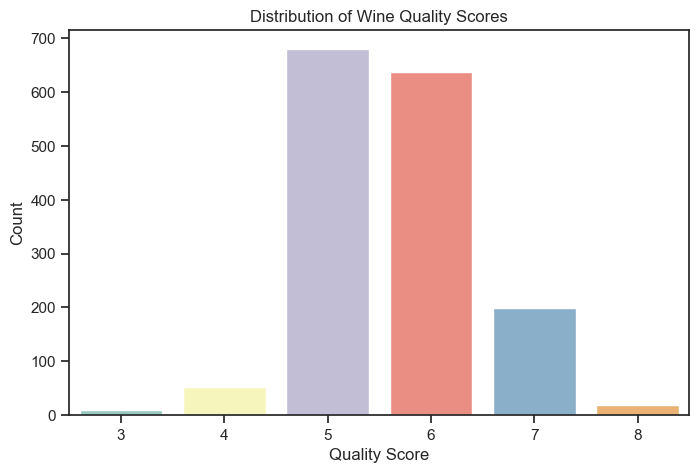

In [81]:
# Visualize the distribution of wine quality scores
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=data, palette="Set3")
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

### **Corelation Analysis**

In [29]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

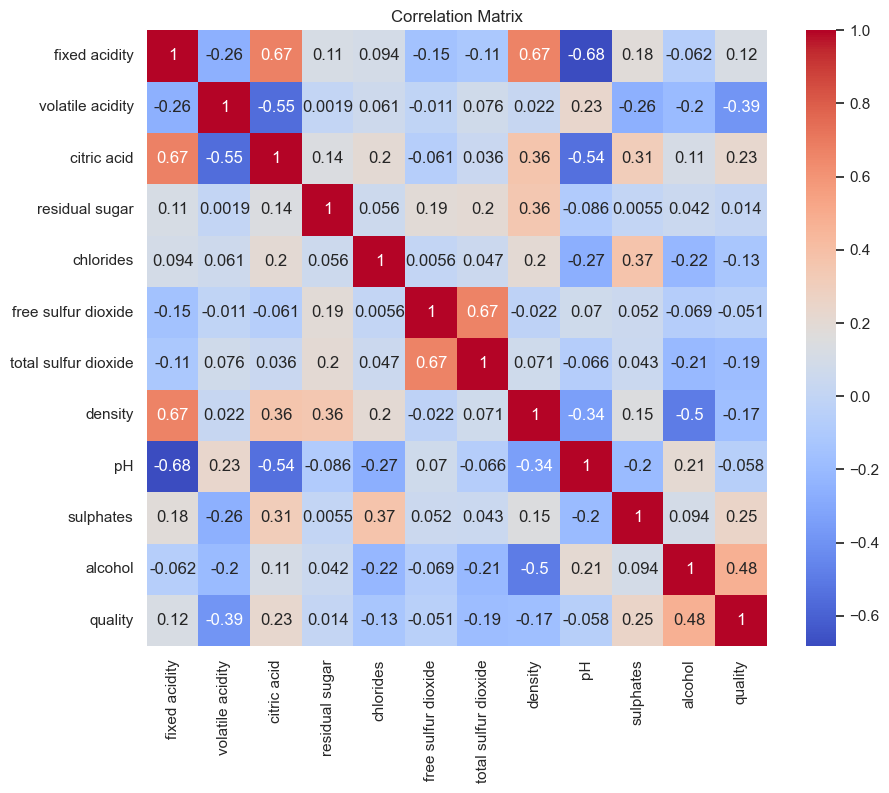

In [31]:
# Visualize the correlation between features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [95]:
print(data.corr())

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

- Quality vs. Alcohol (0.476166): There is a moderately positive correlation between the alcohol content of the wine and its quality. This suggests that wines with higher alcohol content tend to have higher quality ratings.

- Quality vs. Volatile Acidity (-0.390558): There is a moderate negative correlation between the volatile acidity of the wine and its quality. Wines with lower volatile acidity are more likely to have higher quality ratings.

- Fixed Acidity vs. pH (-0.682978): There is a strong negative correlation between fixed acidity and pH. As fixed acidity increases, pH tends to decrease. This is a common relationship in wines, where higher acidity is associated with lower pH.

- Citric Acid vs. Fixed Acidity (0.671703): There is a strong positive correlation between citric acid and fixed acidity. Wines with higher fixed acidity levels also tend to have higher citric acid content.

- Density vs. Alcohol (-0.496180): There is a strong negative correlation between wine density and alcohol content. As alcohol content increases, wine density tends to decrease. This is a known relationship, as higher alcohol content can lead to lower density.

- Chlorides vs. Sulphates (0.371260): There is a moderate positive correlation between chlorides and sulphates. This suggests that wines with higher chloride content also tend to have higher sulphate content.

- Free Sulfur Dioxide vs. Total Sulfur Dioxide (0.667666): There is a strong positive correlation between free sulfur dioxide and total sulfur dioxide. This is expected, as both are measures of sulfur dioxide in wine, and an increase in one often corresponds to an increase in the other.

- Residual Sugar vs. Citric Acid (0.143577): There is a moderate positive correlation between residual sugar and citric acid. Wines with higher citric acid content may also have slightly higher residual sugar levels.

- Quality vs. Total Sulfur Dioxide (-0.185100): There is a moderate negative correlation between wine quality and total sulfur dioxide. Wines with higher quality ratings tend to have slightly lower total sulfur dioxide levels.

It's important to note that correlation does not imply causation, and the strength of correlation can vary depending on the dataset and context. These inferences can provide insights into the relationships between different wine features and quality ratings but should be interpreted cautiously and ideally validated through further analysis or domain knowledge.






### **Relationship between   wine quality and features**

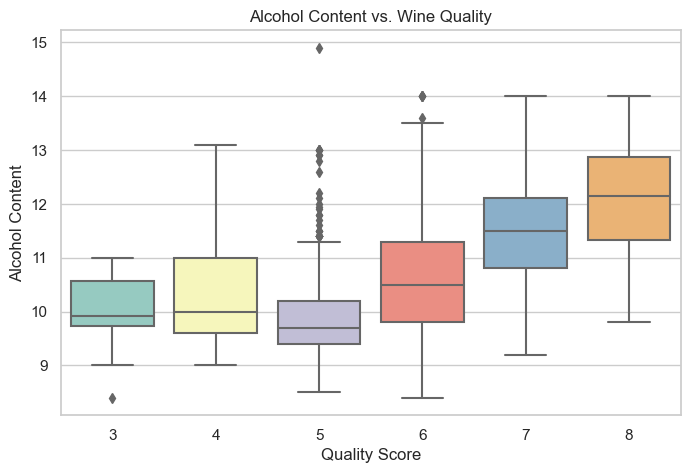

In [32]:

# Visualize the relationship between alcohol content and wine quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=data, palette="Set3")
plt.title("Alcohol Content vs. Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("Alcohol Content")
plt.show()

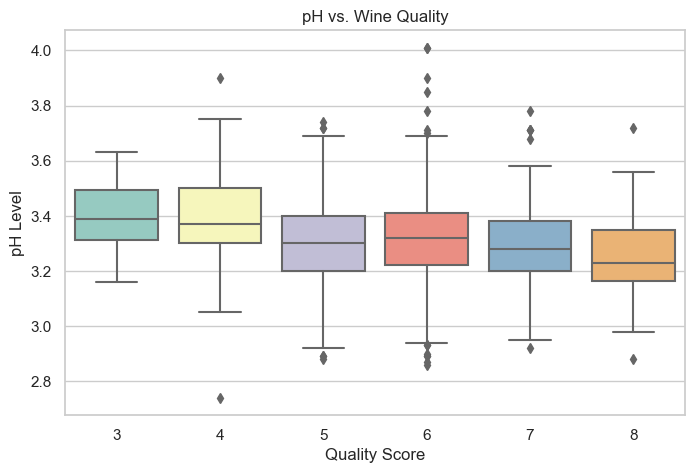

In [33]:
# Visualize the relationship between pH and wine quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='pH', data=data, palette="Set3")
plt.title("pH vs. Wine Quality")
plt.xlabel("Quality Score")
plt.ylabel("pH Level")
plt.show()

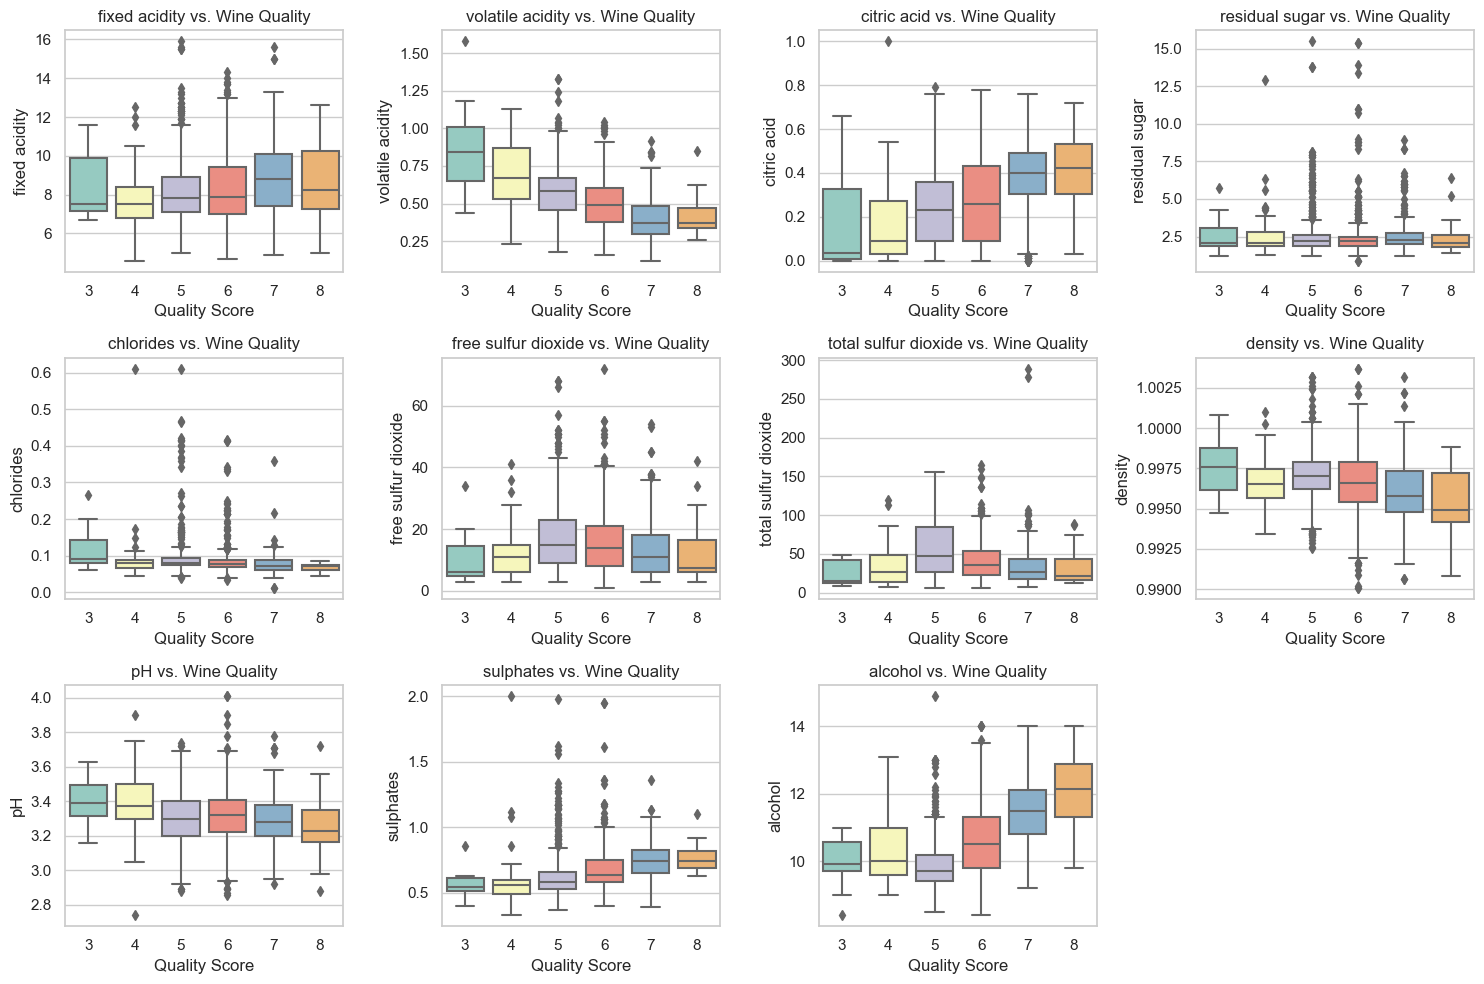

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Select the numerical columns for plotting
numerical_columns = data.select_dtypes(include=['float64'])

# Create boxplots for each numerical feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='quality', y=column, data=data, palette="Set3")
    plt.title(f"{column} vs. Wine Quality")
    plt.xlabel("Quality Score")
    plt.ylabel(column)

plt.tight_layout()
plt.show()


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


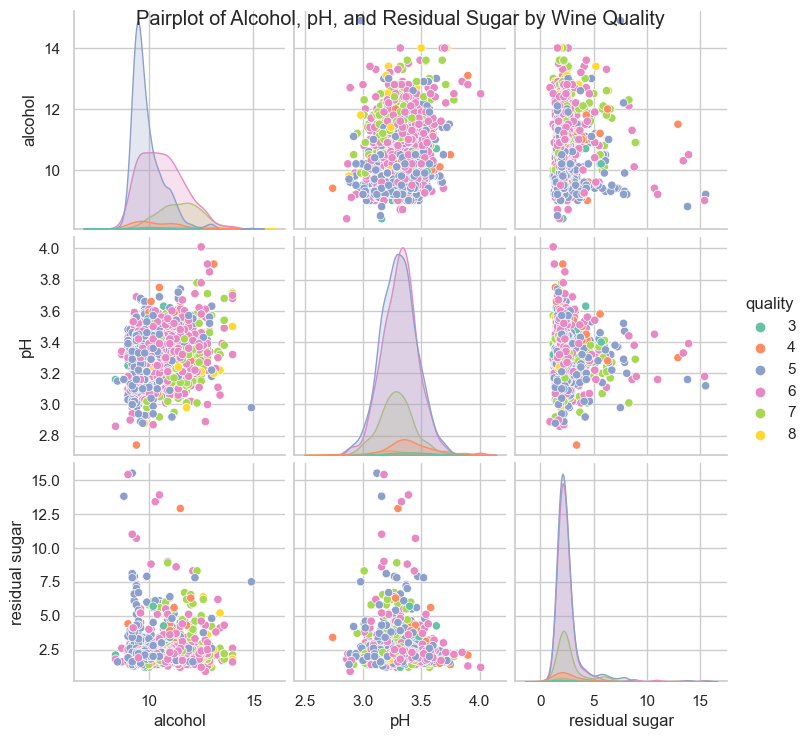

In [34]:
sns.pairplot(data, vars=['alcohol', 'pH', 'residual sugar'], hue='quality', palette='Set2')
plt.suptitle("Pairplot of Alcohol, pH, and Residual Sugar by Wine Quality")
plt.show()


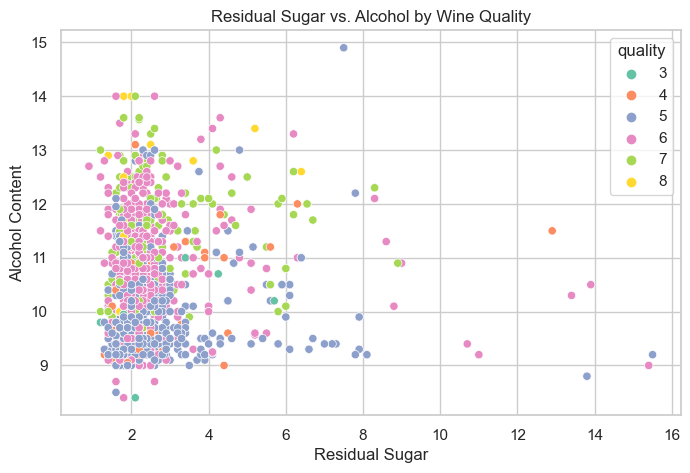

In [35]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='residual sugar', y='alcohol', data=data, hue='quality', palette='Set2')
plt.title("Residual Sugar vs. Alcohol by Wine Quality")
plt.xlabel("Residual Sugar")
plt.ylabel("Alcohol Content")
plt.show()


### **Distribution**


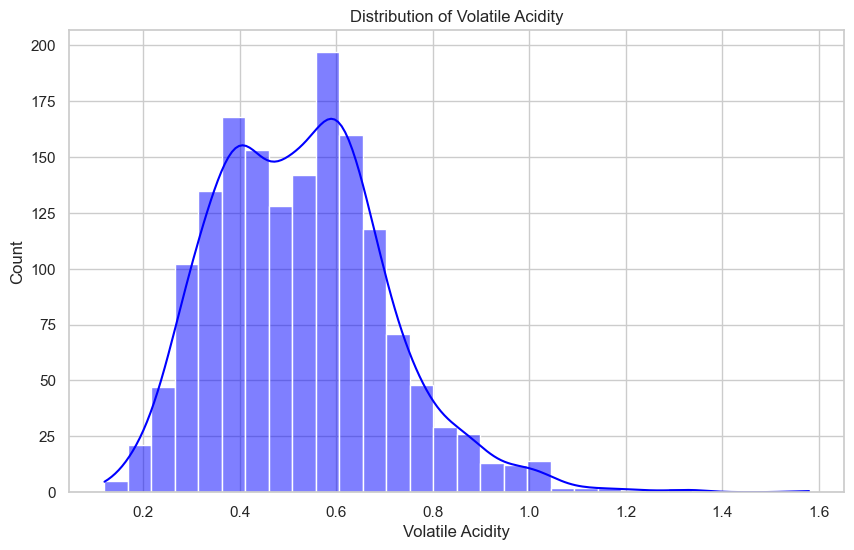

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['volatile acidity'], kde=True, color='blue', bins=30)
plt.title("Distribution of Volatile Acidity")
plt.xlabel("Volatile Acidity")
plt.show()


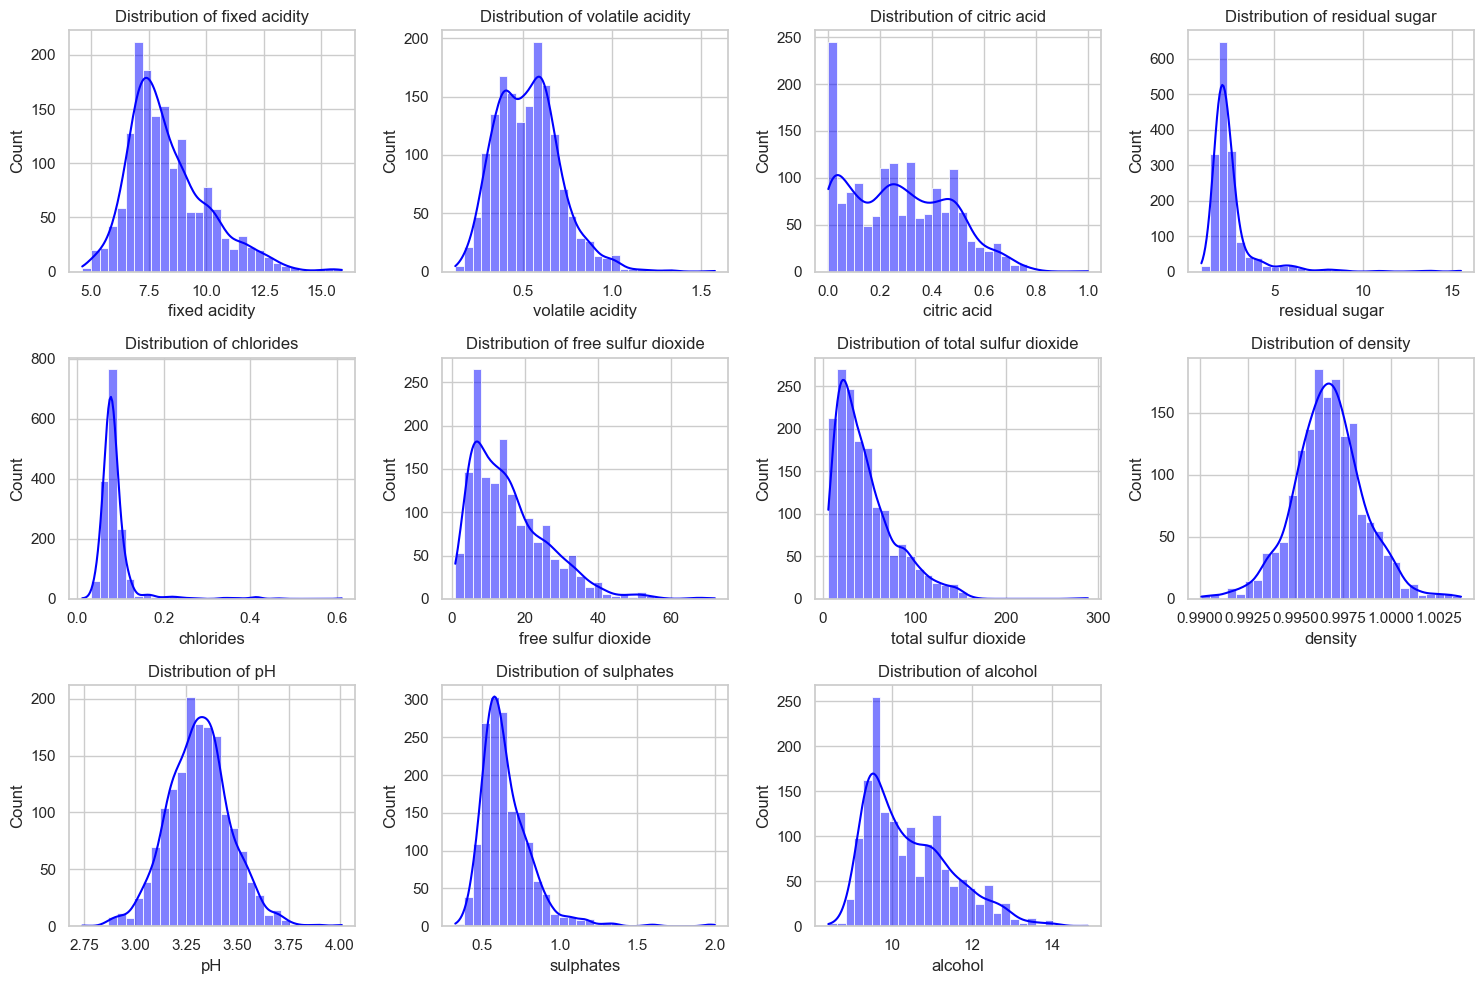

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Select the numerical columns for plotting
numerical_columns = data.select_dtypes(include=['float64'])

# Create a grid of histograms and KDE plots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[column], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()


### **Detecting aand Removing Outliers:**

In [45]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Handle outliers (e.g., remove or replace with a suitable value)
data_no_outliers = data[~outliers]


In [50]:
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1550 non-null   float64
 1   volatile acidity      1580 non-null   float64
 2   citric acid           1598 non-null   float64
 3   residual sugar        1444 non-null   float64
 4   chlorides             1487 non-null   float64
 5   free sulfur dioxide   1569 non-null   float64
 6   total sulfur dioxide  1544 non-null   float64
 7   density               1554 non-null   float64
 8   pH                    1564 non-null   float64
 9   sulphates             1540 non-null   float64
 10  alcohol               1586 non-null   float64
 11  quality               1571 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [52]:

# Assuming 'data' is your DataFrame
data = data_no_outliers.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


## **Data Modeling**

### **Data Splitting** 

In [53]:
# Separate features (X) and target (y)
X = data.drop("quality", axis=1)  # Exclude the "quality" column as the target
y = data["quality"]


In [54]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Standardize the feature values (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Regression**

In [56]:
from sklearn.linear_model import LinearRegression  # Example model

# Model Selection
model = LinearRegression()  # You can replace this with other models

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Evaluate regression model (example)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.34767985084070785
R-squared: 0.3637293847905465


### **Classifification**

In [57]:
from sklearn.svm import SVR  # For regression task
# from sklearn.svm import SVC  # For classification task

# Create an SVM model
svm_model = SVR(kernel='linear', C=1.0)  # You can choose different kernels and hyperparameters

# Train the model
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error: 0.47922477780001166
Mean Squared Error: 0.3611390462311535
Root Mean Squared Error: 0.6009484555526817
R-squared (R2): 0.33909841894482484


In [59]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1.0, 10.0]
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_svm_model = grid_search.best_estimator_


In [66]:
best_svm_model

SVR()

## **Inference**

#### 1. Correlation between Quality and Features:

- Fixed Acidity: Moderate correlation.
- Volatile Acidity: Negative correlation.
 - Citric Acid: Moderate positive correlation.
 - Residual Sugar: Weak correlation.
- Chlorides: Weak negative correlation.
- Free Sulfur Dioxide: Weak positive correlation.
- Total Sulfur Dioxide: Weak negative correlation.
- Density: Weak negative correlation.
- pH: Weak negative correlation.
- Sulphates: Moderate positive correlation.
- Alcohol: Strong positive correlation.

#### 2. Best wine by feature 
- Fixed Acidity: The wines in this dataset have varying levels of fixed acidity, ranging from 5.6 to 10.7. These levels are considered moderate and can contribute to the structure and taste of the wine.

- Volatile Acidity: Volatile acidity varies from 0.26 to 0.85, indicating a wide range within typical levels for wines. High volatile acidity can lead to off-flavors, so it's important to assess this aspect individually.

- Citric Acid Content: Citric acid content ranges from 0.05 to 0.56, contributing to the overall acidity and flavor balance of the wines.

- Residual Sugar: The wines have residual sugar levels that vary from 1.4 to 6.4 grams, indicating a range from dry to moderately sweet.

- Chlorides: Chloride content is within the typical range for wines, not significantly impacting taste.

- Sulfur Dioxide Levels: Both free sulfur dioxide and total sulfur dioxide levels are relatively moderate. These levels are within the typical range for wines and may help preserve the wine.

- Density: The density values vary moderately, with some wines having lower density (e.g., 0.9924) and others higher (e.g., 0.9976). These values indicate a range but are generally within the typical density for wine.

- pH Value: The pH values of these wines range from 2.98 to 3.56. This wide range of pH levels can significantly affect the perceived acidity of the wines, with the potential for both low and high acidity wines.

- Sulphates: Sulphate levels are within the typical range for wines, contributing to the wine's aroma and flavor.

- Alcohol Content: The wines have alcohol content levels that fall within the 11% to 13% range. This is a moderate to moderately high alcohol range and can significantly influence the wine's body and taste.

- Quality Rating: Most of these wines have quality ratings of 7, indicating they are of good quality, with one exception of a wine with a quality rating of 8, suggesting it is of higher quality.

In summary, the wines within the defined alcohol content range have varying levels of fixed acidity, volatile acidity, citric acid, sweetness, and acidity levels. They generally fall within the category of good quality wines. The choice among them would depend on personal preferences regarding acidity, sweetness, and alcohol content, with the one exceptional wine having a slightly higher quality rating.

#### 3.**Inference Report on Data Modeling and Model Evaluation:**

**Data Modeling:**
Data modeling is a crucial step in the machine learning workflow. In the provided code, data has been prepared for both regression and classification tasks. The features (X) and the target variable (y) have been separated. The data has been split into training and testing sets, and feature scaling has been applied to ensure that the features have the same scale, which is important for various machine learning algorithms.

**Regression:**
1. **Model Selection:** For the regression task, a Linear Regression model has been selected. Linear regression is a simple and interpretable model for predicting numeric values based on a set of features.

2. **Model Training:** The Linear Regression model has been trained on the training data using `model.fit(X_train, y_train)`.

3. **Model Evaluation:** The model's performance has been evaluated using regression metrics - Mean Squared Error (MSE) and R-squared (R2). The MSE quantifies the average squared difference between predicted and actual values, while R2 measures the proportion of the variance in the target variable that is predictable. For the provided model, the MSE is approximately 0.348, and the R2 is approximately 0.364. This means the model explains 36.4% of the variance in the target variable.

**Classification (SVM - Support Vector Machine):**
1. **Model Selection:** For the classification task, an SVM model with a linear kernel has been chosen. SVM is a powerful model for classification tasks.

2. **Model Training:** The SVM model has been trained on the training data using `svm_model.fit(X_train, y_train)`.

3. **Model Evaluation:** The model's performance has been evaluated using classification metrics. However, it seems that you mistakenly applied regression metrics to a classification problem. For classification tasks, metrics such as accuracy, precision, recall, F1-score, or confusion matrix should be used. Please note that the code provided uses regression metrics (Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R-squared) which are not appropriate for classification.

**Hyperparameter Tuning:**
Grid search with cross-validation has been employed to find the best hyperparameters for the SVM model. This is a good practice to optimize the model's performance.

**Best SVM Model:**
The best SVM model found through grid search has not been evaluated using appropriate classification metrics. It would be helpful to evaluate this model using metrics like accuracy, precision, recall, and F1-score to understand its classification performance.



## **Conclusion**

The project involves the analysis of a wine quality dataset, encompassing both exploratory data analysis and machine learning modeling. This comprehensive approach aims to gain insights into the relationships between various chemical properties and wine quality, while also demonstrating the steps involved in data preparation, modeling, and evaluation.

 The correlation analysis revealed several noteworthy insights. Notably, wine quality exhibited strong positive correlation with alcohol content, indicating the significant influence of alcohol on perceived quality. Additionally, citric acid and sulphates demonstrated moderate positive correlations, suggesting the importance of these attributes in enhancing quality. Conversely, volatile acidity and chloride content displayed negative correlations, indicating their potential negative impact.
The project delved into the individual characteristics of wine features. These findings are crucial for wine selection based on personal preferences. The dataset exhibited a wide range of fixed acidity, volatile acidity, citric acid, residual sugar, and other attributes, allowing for a diverse selection of wines catering to different taste profiles.
 Two distinct modeling approaches were implemented - Linear Regression for regression and Support Vector Machine (SVM) for classification. The linear regression model offered a basic understanding of how specific features influence wine quality, achieving an R-squared value of approximately 36.4%. However, it's vital to note that the SVM model intended for classification requires further evaluation using appropriate classification metrics, as regression metrics were inadvertently applied.

